plt thresh
101 88
finish
110 87
finish


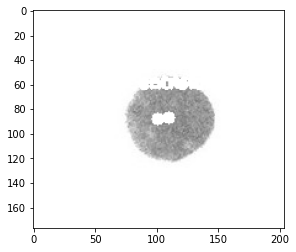

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import argparse

# img = cv2.imread(args["ipimage"]) r'foo55.jpg'
img = cv2.imread('test0401.jpg')#GRAYSCALE
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray_image,220,255,0)
plt.imshow(thresh)
print('plt thresh')
cv2.waitKey(0)
# find contours in the binary image
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# https://github.com/facebookresearch/maskrcnn-benchmark/issues/339
for c in contours:
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
#     cX = int(M["m10"] / M["m00"])
#     cY = int(M["m01"] / M["m00"])
    print(cX,cY)
    cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
    cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    plt.imshow(img)
#     cv2.imshow("Image", img)
    cv2.waitKey(0)
    print('finish')


12
(12, 5)
this is centroids
[[199.5421501  200.07026369]
 [193.          65.        ]
 [209.          65.5       ]
 [203.86956522  67.82608696]
 [102.07407407  93.59259259]
 [288.5        101.        ]
 [ 85.14634146 105.56097561]
 [ 33.         204.        ]
 [ 50.         210.        ]
 [336.         220.        ]
 [308.         318.        ]
 [297.         324.        ]]
this is centroids
[[198.32878  198.30916 ]
 [192.17691   65.210205]
 [207.96916   65.918144]
 [203.09146   67.475494]
 [102.07407   93.59259 ]
 [287.46976  100.34766 ]
 [ 85.882095 106.28104 ]
 [ 29.401463 200.24837 ]
 [ 50.26733  209.71112 ]
 [335.32382  220.38077 ]
 [308.27948  318.19046 ]
 [296.5008   324.80594 ]]
[[199 200 198 198]
 [193  65 192  65]
 [209  65 207  65]
 [203  67 203  67]
 [102  93 102  93]
 [288 101 287 100]
 [ 85 105  85 106]
 [ 33 204  29 200]
 [ 50 210  50 209]
 [336 220 335 220]
 [308 318 308 318]
 [297 324 296 324]]


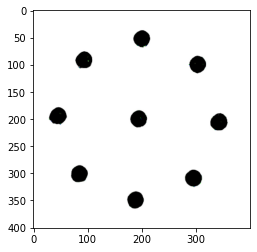

In [1]:
# https://blog.csdn.net/qq_36387683/article/details/80557434
# https://www.daimajiaoliu.com/daima/4fd168a60900418
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

img = cv.imread('foo00.jpg')
img = cv.resize(img, (int(img.shape[1]*0.2), int(img.shape[0]*0.2)))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)
ret, dst = cv.threshold(dst, 0.01*dst.max(), 255, cv.THRESH_BINARY)
dst = np.uint8(dst)
# cv.imwrite('img/thresh3.png', dst)
plt.imshow(dst)
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
'''
connectedComponentsWithStats(image, labels=None, stats=None, centroids=None, connectivity=None, ltype=None)
ret： 返回的标签的数量
labels： 输入图像的大小的矩阵，其中每个元素的值都等于其标签
Stats is a matrix of the stats that the function calculates. It has a length equal to the number of labels and a width equal to the number of stats.
stats：  函数计算的统计信息的矩阵。它的行等于标签的数量，列数等于统计到的信息数量（5个）。
        每个标签的统计输出，包括背景标签。
        输出格式为[cv2.CC_STAT_LEFT, CV.CC_STAT_TOP, CV.CC_STAT_WIDTH, CV.CC_STAT_HEIGHT, CV.CC_STAT_AREA]
        CV.CC_STAT_LEFT： 最左边的（x）坐标，它是水平方向上边界框的包含开始
        CV.CC_STAT_TOP： 最上边的(y)坐标，它是垂直方向上边界框的包含开始
        CV.CC_STAT_TOP： 边界框的水平大小
        CV.CC_STAT_TOP： 边界框的垂直大小
        CV.CC_STAT_TOP： 连接组件的总面积（以像素为单位）
        可以通过stats[label, column]访问
centroids: 具有每个质心的x和y位置的矩阵。此矩阵中的行对应于标签号。
'''
print(ret)
# print(labels)
# print(labels[2])
print(stats.shape)
print('this is centroids')
print(centroids)
print('this is centroids')

#定义停止和细化角点的标准
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)

corners = cv.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)
'''
cornerSubPix(image, corners, winSize, zeroZone, criteria)
image： 8位单通道的灰度图像。
corners： 为整数值的像素位置
winSize： 指定了等式产生的窗口尺寸。
zeroZone： 定义了一个禁区（与win相似，但通常比win小），这个区域在方程组以及自相关矩阵中不被考虑。设置（-1，-1）表示不需要这个区域
criteria：  终止条件。可以是最大迭代次数cv.TERM_CRITERIA_MAX_ITER，或者设定的精度cv.TERM_CRITERIA_EPS类型，或者两者的组合。
'''
print(corners)
res = np.hstack((centroids, corners))
res = np.int0(res)
print(res)

img[res[:, 1], res[:, 0]] = [0, 0, 255]
img[res[:, 3], res[:, 2]] = [0, 255, 0]

# cv.imwrite('img/subpixel2.png', img)
plt.imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()


<ipython-input-7-3d7f993fc361>:19: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv.circle(result_img,(x,y),10,(255,0,0),2)


角点坐标1: (1324.643, 1263.537)
角点坐标2: (2255.5857, 1643.0579)
角点坐标3: (1447.3413, 850.3718)
角点坐标4: (1301.3375, 1231.1438)
角点坐标5: (2175.8396, 1697.4265)
角点坐标6: (2166.6958, 826.1445)
角点坐标7: (1838.2777, 704.6945)
角点坐标8: (1818.4545, 786.91693)
角点坐标9: (1226.3448, 1312.3066)
角点坐标10: (1389.488, 945.8978)
角点坐标11: (2220.6868, 1694.9019)
角点坐标12: (1215.5428, 1298.5918)
角点坐标13: (2841.7124, 2436.3894)
角点坐标14: (1826.3085, 1749.8126)
角点坐标15: (2205.8054, 929.035)
角点坐标16: (3066.5469, 2250.666)
角点坐标17: (1760.0, 1826.0)
角点坐标18: (2367.6152, 1306.6051)
角点坐标19: (2298.412, 415.97507)
角点坐标20: (2172.7217, 939.10394)
角点坐标21: (1430.0, 1712.0)
角点坐标22: (1734.0, 718.0)
角点坐标23: (2223.8608, 850.89606)
角点坐标24: (2165.0, 1590.0)
角点坐标25: (2402.2563, 1277.9404)
角点坐标26: (2396.4412, 1229.9487)
角点坐标27: (1818.5192, 1320.6536)
角点坐标28: (2318.0, 523.0)
角点坐标29: (2250.1946, 1665.1794)
角点坐标30: (2201.1636, 1584.8668)
角点坐标31: (1478.9578, 910.4206)
角点坐标32: (1238.9906, 1323.6432)
角点坐标33: (3032.0625, 2436.5715)
角点坐标34: (1685.5038, 1102.4589)

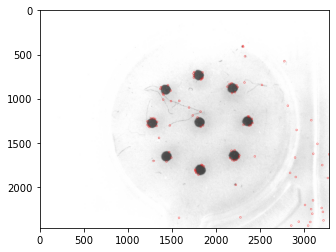

In [7]:
# https://blog.csdn.net/weixin_45645281/article/details/105542473
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
if __name__=='__main__':
    img=cv.imread("Improved108.jpg")
    gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    result_img=img.copy()
    #Shi-Tomasi角点检测
    corners=cv.goodFeaturesToTrack(gray_img,100,0.01,10,blockSize=3,useHarrisDetector=False,k=0.04)
    #迭代算法模板（1.类型 2.迭代次数 3.阈值）
    criteria=(cv.TermCriteria_EPS+cv.TermCriteria_MAX_ITER,30,0.01)
    #亚像素角点检测
    corners2=cv.cornerSubPix(gray_img,corners,(5,5),(-1,-1),criteria)
    j=0
    for i in corners2:
        x,y=i.ravel()
        j=j+1
        cv.circle(result_img,(x,y),10,(255,0,0),2)
        print("角点坐标"+str(j)+":",(x,y))
#     cv.imshow("original image", img)
#     cv.imshow("result image",result_img)
    plt.imshow(result_img)
    cv.imwrite("ma.jpg",result_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

234.0 27.416158536585368
235.0 27.331029185867894
236.0 27.21517027863777
237.0 27.083333333333332
238.0 27.027377521613833
239.0 27.026086956521738
240.0 27.003607503607505
241.0 26.929787234042553
242.0 26.831436699857754
243.0 26.75403817914831
244.0 26.721719457013574
245.0 26.725331369661266
246.0 26.736514522821576
247.0 26.75706594885599
248.0 26.82262569832402
249.0 26.929787234042553
250.0 27.01536312849162
251.0 27.041374474053296
252.0 27.045058139534884
253.0 27.093373493975903
254.0 27.19311377245509
255.0 27.296187683284458
256.0 27.40715372907154
228.0 28.43354943273906
229.0 28.266778523489933
230.0 28.10703363914373
231.0 27.946455505279033
232.0 27.74873949579832
233.0 27.531719532554256
257.0 27.566884176182707
258.0 27.7625786163522
259.0 27.943932411674346
260.0 28.121405750798722
261.0 28.27777777777778
262.0 28.406645569620252
224.0 29.30110497237569
225.0 29.00228310502283
226.0 28.776190476190475
227.0 28.565015479876163
263.0 28.513698630136986
264.0 28.751623

849.0 115.99583333333334
850.0 115.77218934911242
851.0 115.50914076782449
921.7383720930233 116.0
1043.266081871345 116.0
19.74277456647399 117.0
74.26661742983752 117.0
195.742774566474 117.0
294.2738095238095 117.0
363.5268907563025 117.0
397.95896656534956 117.0
458.0022354694486 117.0
492.3666666666667 117.0
543.2647058823529 117.0
684.7950075642965 117.0
746.0 116.55457746478874
747.0 116.78613569321534
748.0 117.00647482014388
749.0 117.21981424148606
750.0 117.48035714285714
843.0 117.49285714285715
844.0 117.23940345368916
845.0 117.00693374422188
846.0 116.74426229508197
921.7383720930233 117.0
1043.266081871345 117.0
19.74277456647399 118.0
74.26435935198822 118.0
195.742774566474 118.0
294.2738095238095 118.0
363.66640746500775 118.0
398.2097288676236 118.0
457.77881619937693 118.0
492.27314814814815 118.0
543.3934550989345 118.0
684.6956834532374 118.0
751.0 117.74797406807131
752.0 117.98502994011976
753.0 118.21189024390245
754.0 118.46729776247848
840.0 118.266891891891

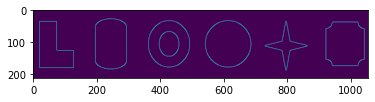

In [24]:
# https://codeleading.com/article/56385214025/
import time
import matplotlib.pyplot as plt
import cv2
import numpy as np
import datetime

start = time.process_time()

kernels_Num = 8
kernels = ['_' for i in range(kernels_Num)]
kernels[0] = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=int)
kernels[1] = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]], dtype=int)
kernels[2] = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=int)
kernels[3] = np.array([[0, -1, -2], [1, 0, -1], [2, 1, 0]], dtype=int)
kernels[4] = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=int)
kernels[5] = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]], dtype=int)
kernels[6] = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=int)
kernels[7] = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]], dtype=int)

img = cv2.imread('test01.jpg')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转成RGB 方便后面显示
# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gradients = ['_' for i in range(kernels_Num)]
for i in range(kernels_Num):
    gradients[i] = cv2.filter2D(grayImage, cv2.CV_16S, kernels[i])
    """
    显示梯度图像  代码
    """
#     cv2.normalize(gradients[i],gradients[i],0,255,cv2.NORM_MINMAX)
#     abs = cv2.convertScaleAbs(gradients[i])
#     cv2.imshow(str(i),abs)
# cv2.imshow('222',img)
# cv2.waitKey(0)

angle_list = [270, 315, 0, 45, 90, 135, 180, 225]
amplitude = np.full(grayImage.shape,0)
angle = np.full(grayImage.shape,-64)

for r in range(grayImage.shape[0]):
    pAmp = amplitude[r]
    pAng = angle[r]

    pGrad = ['_' for i in range(kernels_Num)]
    for i in range(kernels_Num):
        pGrad[i] = gradients[i][r]
    for c in range(grayImage.shape[1]):
        for i in range(kernels_Num):
            if (pAmp[c] < pGrad[i][c]):
                pAmp[c] = pGrad[i][c]
                pAng[c] = angle_list[i]

"""
显示幅值图像  代码
"""
# cv2.normalize(amplitude,amplitude,0,255,cv2.NORM_MINMAX)
# abs = cv2.convertScaleAbs(amplitude)
# cv2.imshow('amplitude',abs)
# cv2.imshow('222',img)
# cv2.waitKey(0)

"""
显示角度图像  代码
"""
# cv2.normalize(angle,angle,0,255,cv2.NORM_MINMAX)
# abs = cv2.convertScaleAbs(angle)
# cv2.imshow('angle',abs)
# cv2.imshow('222',img)
# cv2.waitKey(0)

edge = np.full(grayImage.shape,0)
edge.astype('uint8')
thres = 100 #阈值  设置最小幅度值
for r in range(1, grayImage.shape[0]-1):
    pAmp1 = amplitude[r-1]
    pAmp2 = amplitude[r]
    pAmp3 = amplitude[r+1]

    pAng = angle[r]
    pEdge = edge[r]
    for c in range(1, grayImage.shape[1]-1):

        if (pAmp2[c] < thres):
            continue
        if pAng[c] == 270:
            if pAmp2[c] > pAmp1[c] and pAmp2[c] >= pAmp3[c]:
                pEdge[c] = 255
        elif pAng[c] == 90:
            if pAmp2[c] >= pAmp1[c] and pAmp2[c] > pAmp3[c]:
                pEdge[c] = 255
        elif pAng[c] == 315:
            if pAmp2[c] > pAmp1[c - 1] and pAmp2[c] >= pAmp3[c + 1]:
                pEdge[c] = 255
        elif pAng[c] == 135:
            if pAmp2[c] >= pAmp1[c - 1] and pAmp2[c] > pAmp3[c + 1]:
                pEdge[c] = 255
        elif pAng[c] == 0:
            if pAmp2[c] > pAmp2[c - 1] and pAmp2[c] >= pAmp2[c + 1]:
                pEdge[c] = 255
        elif pAng[c] == 180:
            if pAmp2[c] >= pAmp2[c - 1] and pAmp2[c] > pAmp2[c + 1]:
                pEdge[c] = 255
        elif pAng[c] == 45:
            if pAmp2[c] >= pAmp1[c + 1] and pAmp2[c] > pAmp3[c - 1]:
                pEdge[c] = 255
        elif pAng[c] == 225:
            if pAmp2[c] > pAmp1[c + 1] and pAmp2[c] >= pAmp3[c - 1]:
                pEdge[c] = 255
"""
显示单像素图像
"""
# edge = cv2.convertScaleAbs(edge)
# cv2.imshow('edge',edge)
# cv2.imwrite('edge.png', edge)
# cv2.waitKey(0)
plt.imshow(edge)
"""
亚像素处理
"""
root2 = np.sqrt(2.0)
tri_list = [[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]
for i in range(kernels_Num):
	tri_list[0][i] = np.cos(angle_list[i] * np.pi / 180.0)
	# sin前面的负号非常关键, 因为图像的y方向和直角坐标系的y方向相反
	tri_list[1][i] = -np.sin(angle_list[i] * np.pi / 180.0)
vPts = []
for r in range(1, grayImage.shape[0]-1):
    pAmp1 = amplitude[r - 1]
    pAmp2 = amplitude[r]
    pAmp3 = amplitude[r + 1]

    pAng = angle[r]
    pEdge = edge[r]
    for c in range(1, grayImage.shape[1]-1):
        if (pEdge[c]):
            nAngTmp = 0
            dTmp = 0
            if pAng[c] == 270:
                nAngTmp = 0
                dTmp = (pAmp1[c] - pAmp3[c]) / (pAmp1[c] + pAmp3[c] - 2 * pAmp2[c]) * 0.5
                # print([c + dTmp * tri_list[0][nAngTmp],r + dTmp * tri_list[1][nAngTmp]])
            elif pAng[c] == 90:
                nAngTmp = 4
                dTmp = -(pAmp1[c] - pAmp3[c]) / (pAmp1[c] + pAmp3[c] - 2 * pAmp2[c]) * 0.5
            elif pAng[c] == 315:
                nAngTmp = 1
                dTmp = (pAmp1[c - 1] - pAmp3[c + 1]) / (pAmp1[c - 1] + pAmp3[c + 1] - 2 * pAmp2[c]) * root2 * 0.5
            elif pAng[c] == 135:
                nAngTmp = 5
                dTmp = -(pAmp1[c - 1] - pAmp3[c + 1]) / (pAmp1[c - 1] + pAmp3[c + 1] - 2 * pAmp2[c]) * root2 * 0.5
            elif pAng[c] == 0:
                nAngTmp = 2
                dTmp = (pAmp2[c - 1] - pAmp2[c + 1]) / (pAmp2[c - 1] + pAmp2[c + 1] - 2 * pAmp2[c]) * 0.5
            elif pAng[c] == 180:
                nAngTmp = 6
                dTmp = -(pAmp2[c - 1] - pAmp2[c + 1]) / (pAmp2[c - 1] + pAmp2[c + 1] - 2 * pAmp2[c]) * 0.5
            elif pAng[c] == 45:
                nAngTmp = 3
                dTmp = (pAmp3[c - 1] - pAmp1[c + 1]) / (pAmp1[c + 1] + pAmp3[c - 1] - 2 * pAmp2[c]) * root2 * 0.5
            elif pAng[c] == 225:
                nAngTmp = 7
                dTmp = -(pAmp3[c - 1] - pAmp1[c + 1]) / (pAmp1[c + 1] + pAmp3[c - 1] - 2 * pAmp2[c]) * root2 * 0.5

            x = c + dTmp * tri_list[0][nAngTmp]
            y = r + dTmp * tri_list[1][nAngTmp]
            vPts.append([x,y])
            print(x,y)
"""
输出亚像素坐标
"""
# for x,y in vPts:
print(x,y)

endtime = time.process_time()
print (str(endtime - start) + 's')
